A simple exploration notebook to get some insights about the data.

As per NDA, sample photos are confidential and also it says you cannot disclose confidential information without written consent from the Sponsors. More about NDA on this forum post. Thank you Alan for pointing it out to me.

So here is the revised version of the exploration notebook where the animation part is commented. 

**Please uncomment the Animation part of the notebook and then run it in the local for animation**

**Objective:**

In this competition, The Nature Conservancy asks you to help them detect which species of fish appears on a fishing boat, based on images captured from boat cameras of various angles.  

Your goal is to predict the likelihood of fish species in each picture.

As mentioned in the data page, there are eight target categories available in the dataset.

 1. Albacore tuna
 2. Bigeye tuna
 3. Yellowfin tuna
 4. Mahi Mahi
 5. Opah
 6. Sharks
 7. Other (meaning that there are fish present but not in the above categories)
 8. No Fish (meaning that no fish is in the picture)

**Important points to note:**

 1. Pre-trained models and external data are allowed in the competition, but need to be posted on this [official forum thread][1]
 2. The competition comprises of two stages. Test data for second stage will be released in the last week.   

First let us see the number of image files present for each of the species


  [1]: https://www.kaggle.com/c/the-nature-conservancy-fisheries-monitoring/forums/t/25428/official-pre-trained-model-and-data-thread/144487#post144487

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.misc import imread
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from subprocess import check_output
print(check_output(["ls", "../input/train/"]).decode("utf8"))

ALB
BET
DOL
LAG
NoF
OTHER
SHARK
YFT



So there are 8 folders present inside the train folder, one for each species.

Now let us check the number of files present in each of these sub folders. 

Number of files for the species ALB : 1719
Number of files for the species BET : 200
Number of files for the species DOL : 117
Number of files for the species LAG : 67
Number of files for the species NoF : 465
Number of files for the species OTHER : 299
Number of files for the species SHARK : 176
Number of files for the species YFT : 734


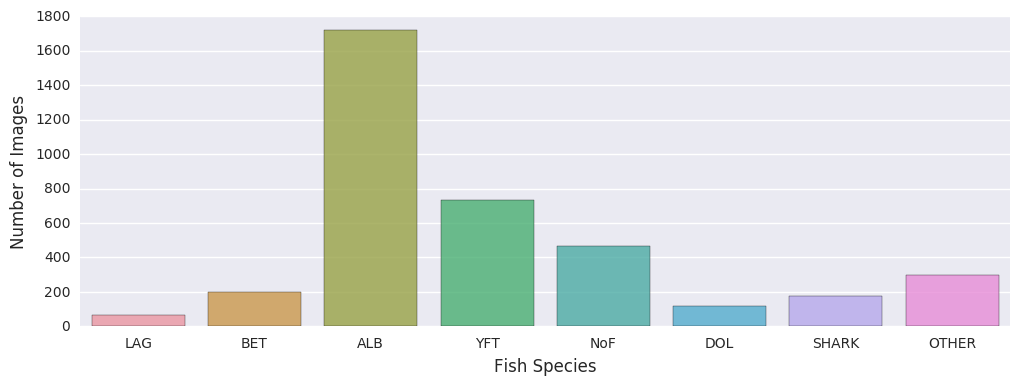

In [2]:
sub_folders = check_output(["ls", "../input/train/"]).decode("utf8").strip().split('\n')
count_dict = {}
for sub_folder in sub_folders:
    num_of_files = len(check_output(["ls", "../input/train/"+sub_folder]).decode("utf8").strip().split('\n'))
    print("Number of files for the species",sub_folder,":",num_of_files)
    count_dict[sub_folder] = num_of_files
    
plt.figure(figsize=(12,4))
sns.barplot(list(count_dict.keys()), list(count_dict.values()), alpha=0.8)
plt.xlabel('Fish Species', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.show()
    

So the number of files for species ALB (Albacore tuna) is much higher than other species. 

Let us look at the number of files present in the test folder.

In [3]:
num_test_files = len(check_output(["ls", "../input/test_stg1/"]).decode("utf8").strip().split('\n'))
print("Number of test files present :", num_test_files)

Number of test files present : 1000


**Image Size:**

Now let us look at the image size of each of the files and see what different sizes are available.

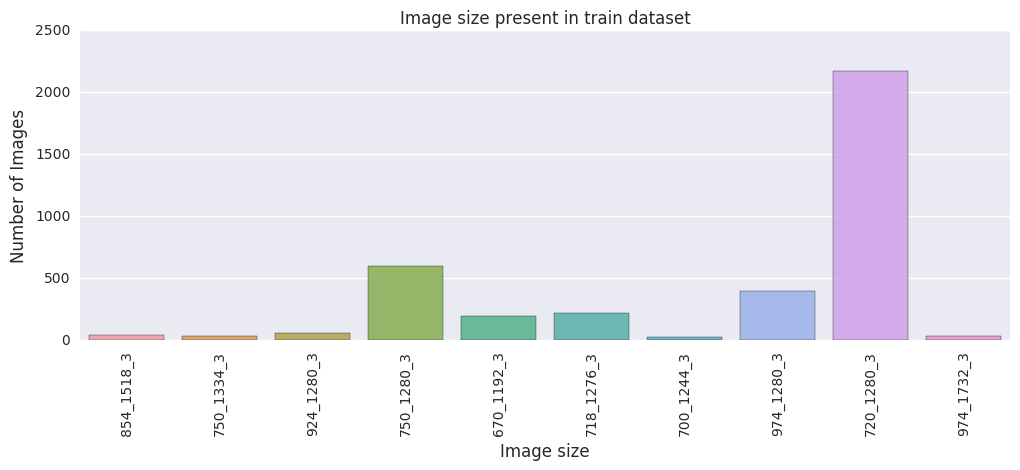

In [4]:
train_path = "../input/train/"
sub_folders = check_output(["ls", train_path]).decode("utf8").strip().split('\n')
different_file_sizes = {}
for sub_folder in sub_folders:
    file_names = check_output(["ls", train_path+sub_folder]).decode("utf8").strip().split('\n')
    for file_name in file_names:
        im_array = imread(train_path+sub_folder+"/"+file_name)
        size = "_".join(map(str,list(im_array.shape)))
        different_file_sizes[size] = different_file_sizes.get(size,0) + 1

plt.figure(figsize=(12,4))
sns.barplot(list(different_file_sizes.keys()), list(different_file_sizes.values()), alpha=0.8)
plt.xlabel('Image size', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title("Image size present in train dataset")
plt.xticks(rotation='vertical')
plt.show()

So 720_1280_3 is the most common image size available in the train data and 10 different sizes are available. 

720_1244_3 is the smallest size of the available images in train set and 974_1732_3 is the largest one.

Now let us look at the distribution in test dataset as well.

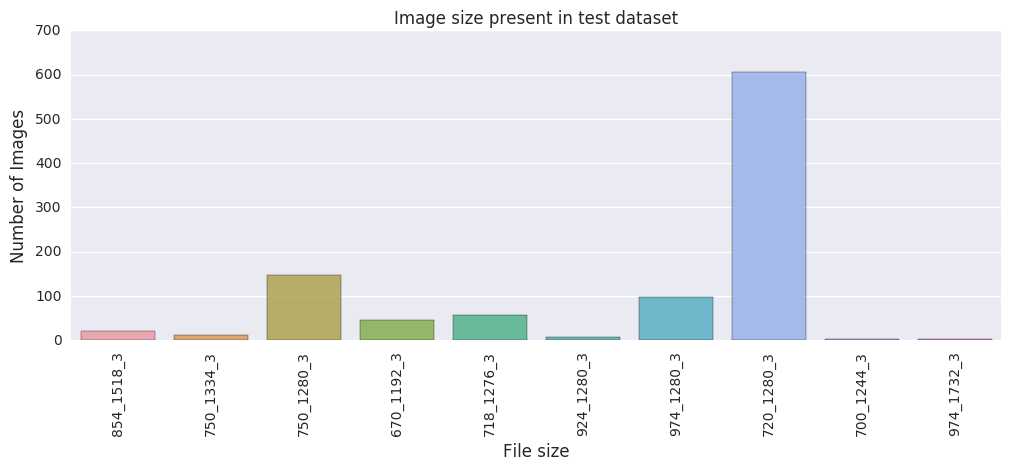

In [5]:
test_path = "../input/test_stg1/"
file_names = check_output(["ls", test_path]).decode("utf8").strip().split('\n')
different_file_sizes = {}
for file_name in file_names:
        size = "_".join(map(str,list(imread(test_path+file_name).shape)))
        different_file_sizes[size] = different_file_sizes.get(size,0) + 1

plt.figure(figsize=(12,4))
sns.barplot(list(different_file_sizes.keys()), list(different_file_sizes.values()), alpha=0.8)
plt.xlabel('File size', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Image size present in test dataset")
plt.show()

Test set also has a very similar distribution.

**Animation:**

Let us try to have some animation on the available images.  Not able to embed the video in the notebook.

**Please uncomment the following part of the code and run it in local for animation**

In [6]:
"""
import random
import matplotlib.animation as animation
from matplotlib import animation, rc
from IPython.display import HTML

random.seed(12345)
train_path = "../input/train/"
sub_folders = check_output(["ls", train_path]).decode("utf8").strip().split('\n')
different_file_sizes = {}
all_files = []
for sub_folder in sub_folders:
    file_names = check_output(["ls", train_path+sub_folder]).decode("utf8").strip().split('\n')
    selected_files = random.sample(file_names, 10)
    for file_name in selected_files:
        all_files.append([sub_folder,file_name])

fig = plt.figure()
sns.set_style("whitegrid", {'axes.grid' : False})
img_file = "".join([train_path, sub_folder, "/", file_name])
im = plt.imshow(imread(img_file), vmin=0, vmax=255)

def updatefig(ind):
    sub_folder = all_files[ind][0]
    file_name = all_files[ind][1]
    img_file = "".join([train_path, sub_folder, "/", file_name])
    im.set_array(imread(img_file))
    plt.title("Species : "+sub_folder, fontsize=15)
    return im,

ani = animation.FuncAnimation(fig, updatefig, frames=len(all_files))
ani.save('lb.gif', fps=1, writer='imagemagick')
#rc('animation', html='html5')
#HTML(ani.to_html5_video())
plt.show()
"""

'\nimport random\nimport matplotlib.animation as animation\nfrom matplotlib import animation, rc\nfrom IPython.display import HTML\n\nrandom.seed(12345)\ntrain_path = "../input/train/"\nsub_folders = check_output(["ls", train_path]).decode("utf8").strip().split(\'\n\')\ndifferent_file_sizes = {}\nall_files = []\nfor sub_folder in sub_folders:\n    file_names = check_output(["ls", train_path+sub_folder]).decode("utf8").strip().split(\'\n\')\n    selected_files = random.sample(file_names, 10)\n    for file_name in selected_files:\n        all_files.append([sub_folder,file_name])\n\nfig = plt.figure()\nsns.set_style("whitegrid", {\'axes.grid\' : False})\nimg_file = "".join([train_path, sub_folder, "/", file_name])\nim = plt.imshow(imread(img_file), vmin=0, vmax=255)\n\ndef updatefig(ind):\n    sub_folder = all_files[ind][0]\n    file_name = all_files[ind][1]\n    img_file = "".join([train_path, sub_folder, "/", file_name])\n    im.set_array(imread(img_file))\n    plt.title("Species : "+su

**Basic CNN Model using Keras:**

Now let us try to build a CNN model on the dataset. Due to the memory constraints of the kernels, let us take only (500,500,3) array from top left corner of each image and then try to classify based on that portion.

Kindly note that running it offline with the full image will give much better results. This is just a started script I tried and I am a newbie for image classification problems. 

In [7]:
import random
from subprocess import check_output
from scipy.misc import imread
import numpy as np
np.random.seed(2016)
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

batch_size = 1
nb_classes = 8
nb_epoch = 1

img_rows, img_cols, img_rgb = 500, 500, 3
nb_filters = 4
pool_size = (2, 2)
kernel_size = (3, 3)
input_shape = (img_rows, img_cols, 3)

species_map_dict = {
'ALB':0,
'BET':1,
'DOL':2,
'LAG':3,
'NoF':4,
'OTHER':5,
'SHARK':6,
'YFT':7
}

def batch_generator_train(sample_size):
	train_path = "../input/train/"
	all_files = []
	y_values = []
	sub_folders = check_output(["ls", train_path]).decode("utf8").strip().split('\n')
	for sub_folder in sub_folders:
		file_names = check_output(["ls", train_path+sub_folder]).decode("utf8").strip().split('\n')
		for file_name in file_names:
			all_files.append([sub_folder, '/', file_name])
			y_values.append(species_map_dict[sub_folder])
	number_of_images = range(len(all_files))

	counter = 0
	while True:
		image_index = random.choice(number_of_images)
		file_name = "".join([train_path] + all_files[image_index])
		print(file_name)
		y = [0]*8
		y[y_values[image_index]] = 1
		y = np.array(y).reshape(1,8)
		
		im_array = imread(file_name)
		X = np.zeros([1, img_rows, img_cols, img_rgb])
		#X[:im_array.shape[0], :im_array.shape[1], 3] = im_array.copy().astype('float32')
		X[0, :, :, :] = im_array[:500,:500,:].astype('float32')
		X /= 255.
        
		print(X.shape)
		yield X,y
		
		counter += 1
		#if counter == sample_size:
		#	break

def batch_generator_test(all_files):
	for file_name in all_files:
		file_name = test_path + file_name
		
		im_array = imread(file_name)
		X = np.zeros([1, img_rows, img_cols, img_rgb])
		X[0,:, :, :] = im_array[:500,:500,:].astype('float32')
		X /= 255.

		yield X


def keras_cnn_model():
	model = Sequential()
	model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
	model.add(Activation('relu'))
	model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
	model.add(Activation('relu'))
	model.add(MaxPooling2D(pool_size=pool_size))
	model.add(Dropout(0.25))	
	model.add(Flatten())
	model.add(Dense(128))
	model.add(Activation('relu'))
	model.add(Dropout(0.5))
	model.add(Dense(nb_classes))
	model.add(Activation('softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adadelta')
	return model

model = keras_cnn_model()
fit= model.fit_generator(
	generator = batch_generator_train(100),
	nb_epoch = 1,
	samples_per_epoch = 100
)

test_path = "../input/test_stg1/"
all_files = []
file_names = check_output(["ls", test_path]).decode("utf8").strip().split('\n')
for file_name in file_names:
	all_files.append(file_name)
#preds = model.predict_generator(generator=batch_generator_test(all_files), val_samples=len(all_files))

#out_df = pd.DataFrame(preds)
#out_df.columns = ['ALB', 'BET', 'DOL', 'LAG', 'NoF', 'OTHER', 'SHARK', 'YFT']
#out_df['image'] = all_files
#out_df.to_csv("sample_sub_keras.csv", index=False)

Using TensorFlow backend.


Epoch 1/1
../input/train/OTHER/img_02942.jpg
(1, 500, 500, 3)
../input/train/LAG/img_00784.jpg
(1, 500, 500, 3)
../input/train/NoF/img_00008.jpg
(1, 500, 500, 3)
../input/train/ALB/img_06979.jpg
(1, 500, 500, 3)
../input/train/ALB/img_00356.jpg
(1, 500, 500, 3)
../input/train/ALB/img_02174.jpg
(1, 500, 500, 3)
../input/train/ALB/img_03188.jpg
(1, 500, 500, 3)
../input/train/ALB/img_05648.jpg
(1, 500, 500, 3)
../input/train/ALB/img_05163.jpg
(1, 500, 500, 3)
../input/train/ALB/img_06563.jpg
(1, 500, 500, 3)
../input/train/ALB/img_04140.jpg
(1, 500, 500, 3)
  1/100 [..............................] - ETA: 194s - loss: 2.4752../input/train/ALB/img_06749.jpg
(1, 500, 500, 3)
  2/100 [..............................] - ETA: 146s - loss: 2.2721../input/train/ALB/img_02555.jpg
(1, 500, 500, 3)
  3/100 [..............................] - ETA: 131s - loss: 3.5473../input/train/DOL/img_06579.jpg
(1, 500, 500, 3)
  4/100 [>.............................] - ETA: 121s - loss: 4.3629../input/train/ALB/i